In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0287-09.SST.nc')
plotvar = data.variables['TEMP'][0,:,:]
#plotvar[plotvar < 0] = np.nan
lont = data.variables['TLONG']
latt = data.variables['TLAT']
#lont = lont[603:808,600:1100] # 50S - 35S
#latt = latt[603:808,600:1100]
lont = lont[:,:] # 50S - 35S
latt = latt[:,:]
plotvar = plotvar[51,:,:]
plotvar[plotvar == -1.0] = np.nan

In [3]:
lont1 = lont[603:808,600]
latt1 = latt[603:808,600]
lont2 = lont[603:808,1100]
latt2 = latt[603:808,1100]
lont3 = lont[603,600:1100] # 50S - 35S
latt3 = latt[603,600:1100]
lont4 = lont[808,600:1100] # 50S - 35S
latt4 = latt[808,600:1100]
lont5 = lont[603,1300:1500] # 50S - 35S
latt5 = latt[603,1300:1500]
lont6 = lont[426,1300:1500] # 
latt6 = latt[426,1300:1500]
lont7 = lont[426:603,1300] # 
latt7 = latt[426:603,1300]
lont8 = lont[426:603,1500] # 5
latt8 = latt[426:603,1500]

lont9 = lont[426,800:1000] # 5
latt9 = latt[426,800:1000]
lont10 = lont[521,800:1000] # 5
latt10 = latt[521,800:1000]
lont11 = lont[426:521,800] # 5
latt11 = latt[426:521,800]
lont12 = lont[426:521,1000] # 5
latt12 = latt[426:521,1000]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: No contour levels were found within the data range.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


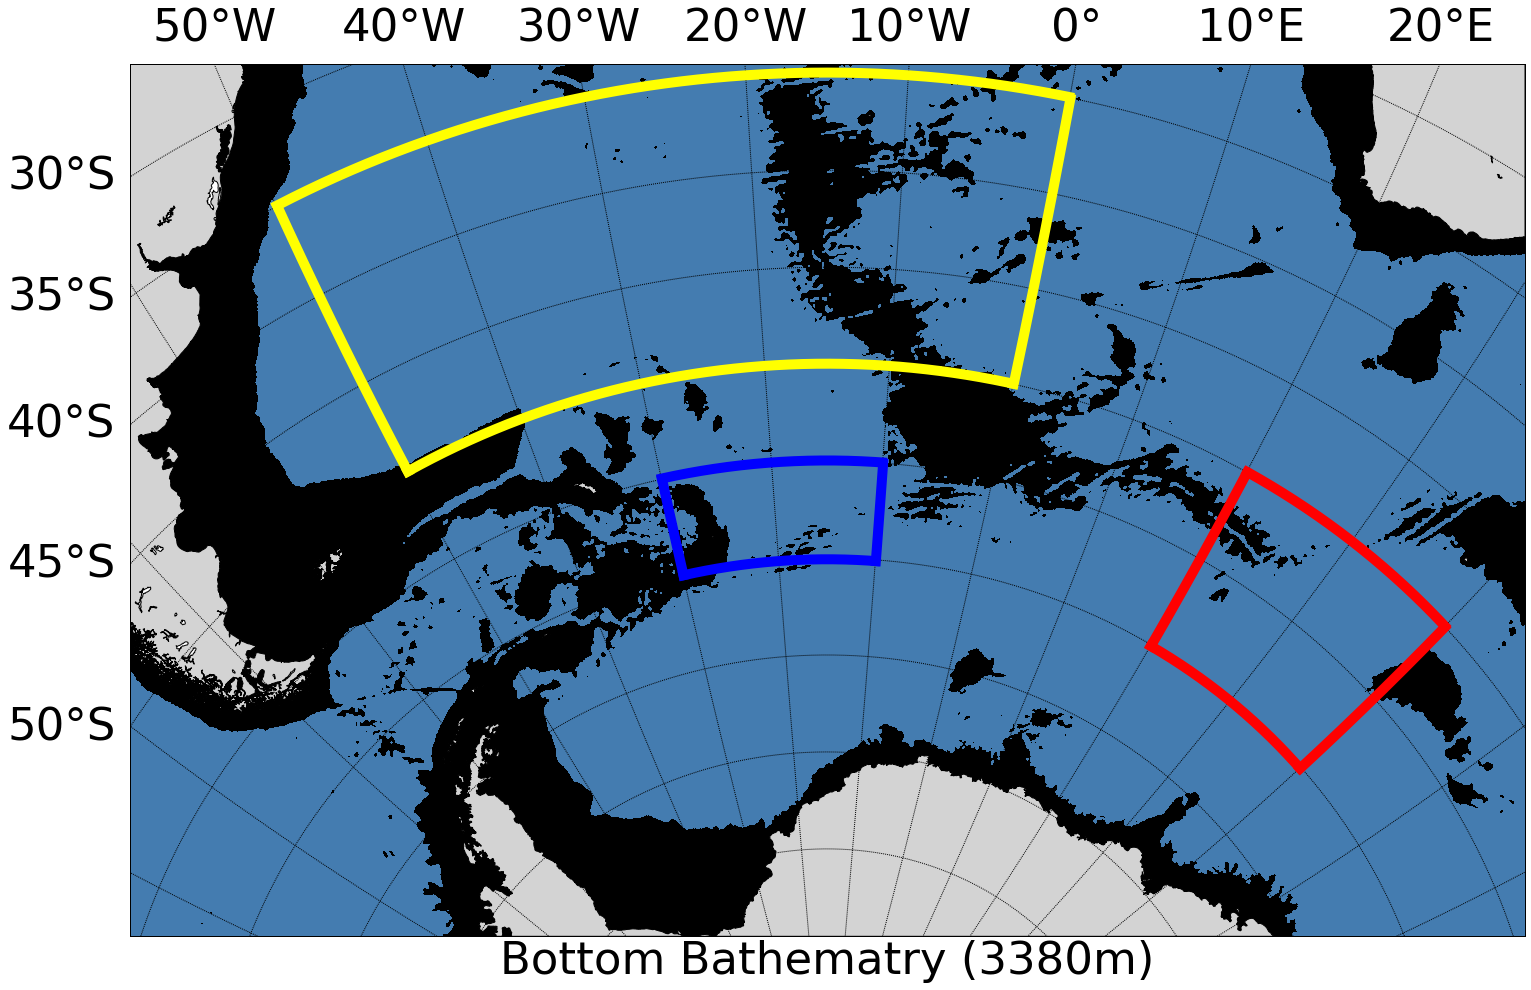

In [4]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [8,10,12,14,16,18,20]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -57, lon_0 = -15,area_thresh = 100,\
                     width = 8000000,height = 5000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('white')
####### set the box
x1,y1=map(lont1,latt1)
x2,y2=map(lont2,latt2)
x3,y3=map(lont3,latt3)
x4,y4=map(lont4,latt4)
x5,y5=map(lont5,latt5)
x6,y6=map(lont6,latt6)
x7,y7=map(lont7,latt7)
x8,y8=map(lont8,latt8)
x9,y9=map(lont9,latt9)
x10,y10=map(lont10,latt10)
x11,y11=map(lont11,latt11)
x12,y12=map(lont12,latt12)
map.plot(x1,y1,'yellow',linewidth=10)
map.plot(x2,y2,'yellow',linewidth=10)
map.plot(x3,y3,'yellow',linewidth=10)
map.plot(x4,y4,'yellow',linewidth=10)
map.plot(x5,y5,'red',linewidth=10)
map.plot(x6,y6,'red',linewidth=10)
map.plot(x7,y7,'red',linewidth=10)
map.plot(x8,y8,'red',linewidth=10)
map.plot(x9,y9,'blue',linewidth=10)
map.plot(x10,y10,'blue',linewidth=10)
map.plot(x11,y11,'blue',linewidth=10)
map.plot(x12,y12,'blue',linewidth=10)
###############################
CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
map.drawmapboundary(fill_color='black')
plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar =map.colorbar(CP,extendfrac='auto')
#cbar.minorticks_on()
#cbar.ax.tick_params(labelsize=40) 
#cbar.set_label('($^\circ$C)', **my_font)
plt.xlabel("Bottom Bathematry (3380m)",**my_font)
plt.savefig("SOM.png",bbox_inches='tight')

In [5]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(45,46)]
i =0
result = np.zeros((12,901,3600))

In [6]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SST.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[:,:]
        latt = latt[:,:]
        plotvar = plotvar[:,:,:]
        plotvar = np.nanmean(plotvar[:,:,:],axis=0)
        result[i,:,:] = plotvar
        
        i = i + 1

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


In [7]:
result.shape

(12, 901, 3600)

In [8]:
mean = result.mean(axis = 0)

In [9]:
ano = result - mean

In [10]:
ano[0]

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.25467785, 0.23726225, 0.2165912 , ..., 0.26749237, 0.27772856,
        0.26934584],
       [0.22757562, 0.2167778 , 0.20014723, ..., 0.22696527, 0.23621631,
        0.2350138 ],
       [0.2332406 , 0.23016651, 0.21937633, ..., 0.20824424, 0.22656846,
        0.23315406]])

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'spacing'


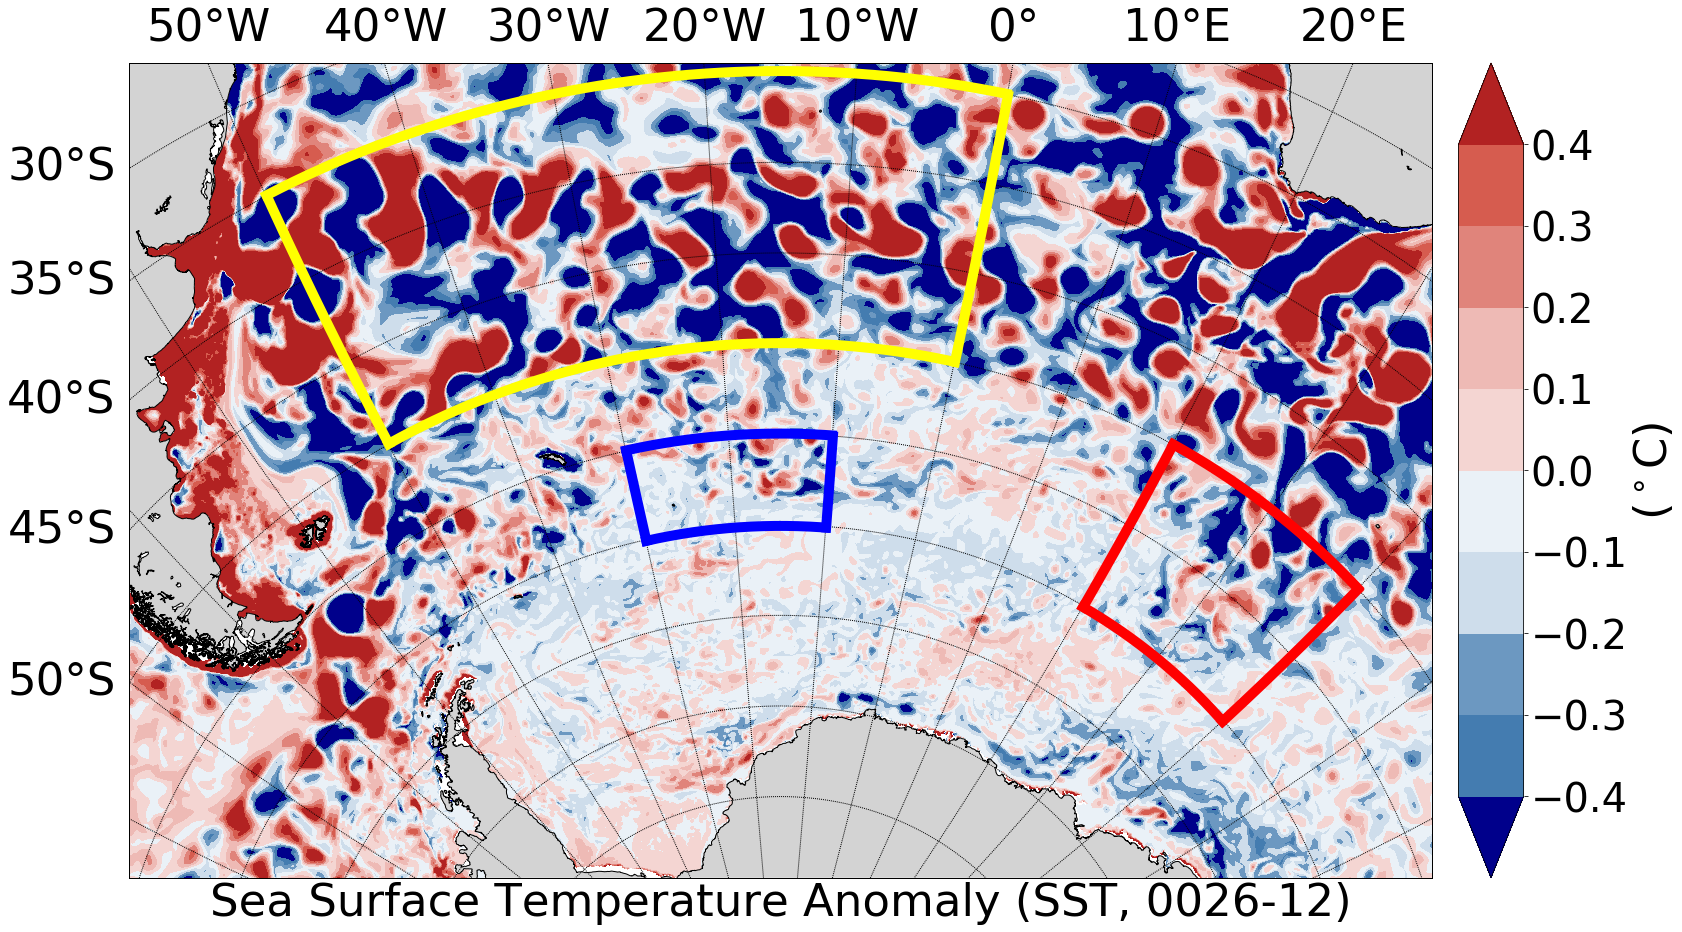

In [13]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,120,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -57, lon_0 = -15,area_thresh = 100,\
                     width = 8000000,height = 5000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,ano[11],levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
####### set the box
x1,y1=map(lont1,latt1)
x2,y2=map(lont2,latt2)
x3,y3=map(lont3,latt3)
x4,y4=map(lont4,latt4)
x5,y5=map(lont5,latt5)
x6,y6=map(lont6,latt6)
x7,y7=map(lont7,latt7)
x8,y8=map(lont8,latt8)
x9,y9=map(lont9,latt9)
x10,y10=map(lont10,latt10)
x11,y11=map(lont11,latt11)
x12,y12=map(lont12,latt12)
map.plot(x1,y1,'yellow',linewidth=10)
map.plot(x2,y2,'yellow',linewidth=10)
map.plot(x3,y3,'yellow',linewidth=10)
map.plot(x4,y4,'yellow',linewidth=10)
map.plot(x5,y5,'red',linewidth=10)
map.plot(x6,y6,'red',linewidth=10)
map.plot(x7,y7,'red',linewidth=10)
map.plot(x8,y8,'red',linewidth=10)
map.plot(x9,y9,'blue',linewidth=10)
map.plot(x10,y10,'blue',linewidth=10)
map.plot(x11,y11,'blue',linewidth=10)
map.plot(x12,y12,'blue',linewidth=10)
###############################
#CS=map.contour(x,y,ano[-1],[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto')
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=40) 
cbar.set_label('($^\circ$C)', **my_font)
plt.xlabel("Sea Surface Temperature Anomaly (SST, 0026-12)",**my_font)
plt.savefig("SOM1.png",bbox_inches='tight')